Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Loading the dataset
data = pd.read_excel('/content/Lagos_weather_dataset.xlsx')

In [ ]:
# Displaying the first few rows of the dataset
print(data.head())

    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos 2004-05-13     31.7     28.2  30.0          38.9          32.6   
1  Lagos 2004-05-14     26.6     25.7  26.3          26.6          25.7   
2  Lagos 2004-05-15     25.1     25.1  25.1          25.1          25.1   
3  Lagos 2004-05-16     22.9     22.9  22.9          22.9          22.9   
4  Lagos 2004-05-17     31.4     25.1  28.6          38.7          25.1   

   feelslike   dew  humidity  ...  severerisk              sunrise  \
0       35.8  24.9      74.7  ...         NaN  2004-05-13T06:30:34   
1       26.3  25.9      97.5  ...         NaN  2004-05-14T06:30:27   
2       25.1  25.1     100.0  ...         NaN  2004-05-15T06:30:20   
3       22.9  22.2      95.8  ...         NaN  2004-05-16T06:30:14   
4       33.6  25.5      84.2  ...         NaN  2004-05-17T06:30:08   

                sunset moonphase        conditions  \
0  2004-05-13T18:55:02      0.80  Partially cloudy   
1  2004-05-14T18:55:

In [ ]:
# Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              7357 non-null   object        
 1   datetime          7357 non-null   datetime64[ns]
 2   tempmax           7021 non-null   float64       
 3   tempmin           7021 non-null   float64       
 4   temp              7021 non-null   float64       
 5   feelslikemax      7021 non-null   float64       
 6   feelslikemin      7021 non-null   float64       
 7   feelslike         7021 non-null   float64       
 8   dew               7021 non-null   float64       
 9   humidity          7021 non-null   float64       
 10  precip            7021 non-null   float64       
 11  precipprob        7021 non-null   float64       
 12  precipcover       7357 non-null   float64       
 13  preciptype        3340 non-null   object        
 14  flood occurrence  3481 n

In [ ]:
# Displaying the column names in the dataset
data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [ ]:
#Renaming columns
data.columns = ['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood_occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin']

In [ ]:
# Displaying the renamed columns
data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood_occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

Data Cleaning

In [ ]:
# Selecting specific columns for analysis
weather_data = data.filter(['datetime','precip','precipprob',  'precipcover', 'preciptype','windgust', 'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp','dew', 'humidity', 'sealevelpressure', 'moonphase', 'flood_occurence'] , axis=1)
weather_data.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,NaN,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,NaN,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,NaN,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,NaN,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,NaN,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [ ]:
# Filling missing values in the 'preciptype' column with 'no_rain'
weather_data.preciptype.fillna('no_rain', inplace=True)

# Displaying the first few rows of the columns
weather_data.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,no_rain,NaN,20.5,128.2,31.7,28.2,30.0,24.9,74.7,NaN,0.80
1,2004-05-14,0.0,0.0,0.0,no_rain,NaN,20.5,280.4,26.6,25.7,26.3,25.9,97.5,NaN,0.83
2,2004-05-15,0.0,0.0,0.0,no_rain,NaN,16.6,180.0,25.1,25.1,25.1,25.1,100.0,NaN,0.87
3,2004-05-16,0.0,0.0,0.0,no_rain,NaN,11.2,350.0,22.9,22.9,22.9,22.2,95.8,NaN,0.90
4,2004-05-17,0.0,0.0,0.0,no_rain,NaN,31.3,242.3,31.4,25.1,28.6,25.5,84.2,NaN,0.94


In [ ]:
# Filling missing values in the 'windgust' column with the median value
median = weather_data.windgust.median()
 weather_data.windgust.fillna(median, inplace=True)

In [ ]:
# Filling missing values in the 'sealevelpressure' column with the median value
median = weather_data.sealevelpressure.median()
median

1011.9

In [ ]:
weather_data.sealevelpressure.fillna(median, inplace=True)

In [ ]:
weather_data.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94


In [ ]:
# Handling flood occurrence data
flood_occurences = data.flood_occurrence
flood_occurences.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: flood_occurrence, dtype: float64

In [ ]:
flood_occurences.fillna(0, inplace=True)

In [ ]:
weather_data.isna().sum()

datetime              0
precip              336
precipprob          336
precipcover           0
preciptype            0
windgust              0
windspeed           366
winddir             714
tempmax             336
tempmin             336
temp                336
dew                 336
humidity            336
sealevelpressure      0
moonphase           366
dtype: int64

In [ ]:
# Dropping any remaining rows with missing values
weather_data.dropna(inplace=True)

In [ ]:
weather_data.isna().sum()

datetime            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
dtype: int64

In [ ]:
# Re-adding the 'flood_occurrence' column to the dataset
weather_data['flood_occurence'] = flood_occurences

In [ ]:
#Displaying the cleaned data
weather_data.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0


In [ ]:
# Converting 'datetime' column to datetime type
datetime = pd.to_datetime(weather_data['datetime'])

In [ ]:
# Checking for missing values again
weather_data.isna().sum()

datetime            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
sealevelpressure    0
moonphase           0
flood_occurence     0
dtype: int64

In [ ]:

# Displaying the shape of the cleaned dataset
weather_data.shape

(6643, 16)

In [ ]:
# Checking for any remaining missing values
weather_data.isna()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7353,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7355,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Saving the cleaned dataset to a CSV file
weather_data.to_csv('Cleaned_weather_dataset_of_Lagos.csv', index=False)

Feature Engineering

In [ ]:
# Extracting year, month, and day from the 'datetime' column
weather_data['year'] = datetime.dt.year
weather_data['month'] = datetime.dt.month
weather_data['day'] = datetime.dt.day

In [ ]:

# Displaying the dataset with new features
weather_data.head()

,datetime,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,2004-05-13,0.0,0.0,0.0,no_rain,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,0.0,2004,5,13
1,2004-05-14,0.0,0.0,0.0,no_rain,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,0.0,2004,5,14
2,2004-05-15,0.0,0.0,0.0,no_rain,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,0.0,2004,5,15
3,2004-05-16,0.0,0.0,0.0,no_rain,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,0.0,2004,5,16
4,2004-05-17,0.0,0.0,0.0,no_rain,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,0.0,2004,5,17


In [ ]:
# Dropping the original 'datetime' column
weather_data.drop(['datetime'], axis=1, inplace=True)

Correlation

In [ ]:
# Calculating the correlation matrix
corr = weather_data.corr(numeric_only=True)

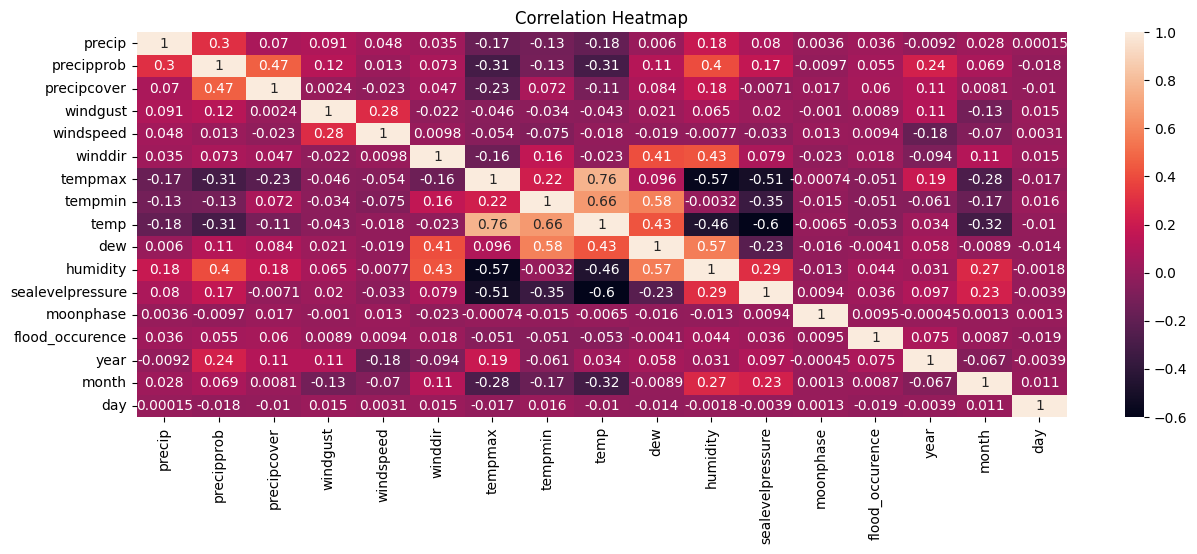

In [ ]:
# Plotting the correlation heatmap
plt.figure(figsize=(15,5))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Replacing numeric flood occurrence values with categorical labels
weather_data.flood_occurence.replace(0, 'no_flood', inplace=True)
weather_data.flood_occurence.replace(1, 'flood', inplace=True)

Exploratory Data Analysis

In [ ]:
# Filtering data for flood occurrences
flood_data = weather_data[weather_data['flood_occurence'] == 'flood']

In [ ]:
# Displaying the filtered flood data
flood_data

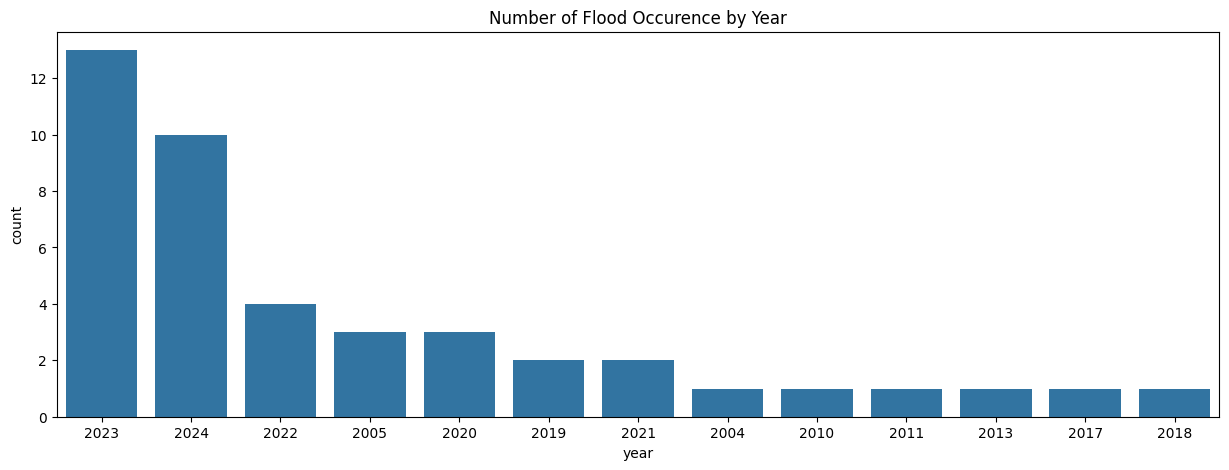

In [ ]:
# showing the trend of flood occurence by year
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(x='year', data=flood_data, order=flood_data['year'].value_counts().index)
plt.show()

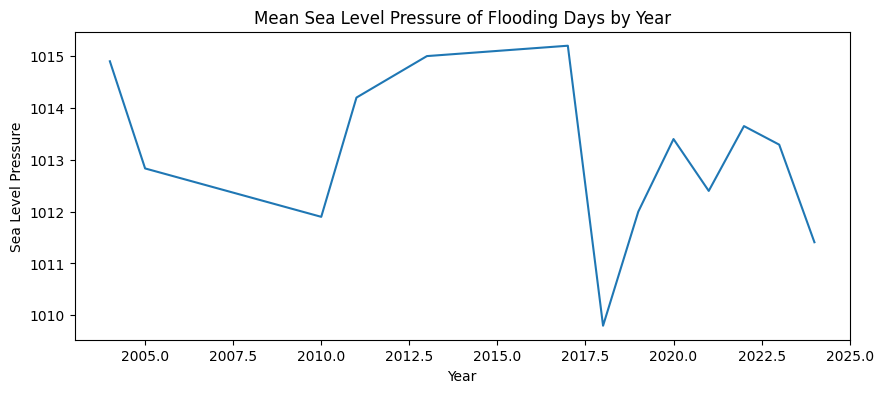

In [ ]:
# Plotting the mean sea level pressure of flooding days by year
plt.figure(figsize=(10,4))
x = flood_data.groupby("year")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Sea Level Pressure of Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Sea Level Pressure')
plt.show()

In [ ]:
# Displaying the mean sea level pressure during flood occurrences
flood_data["sealevelpressure"].mean()

1012.7906976744187

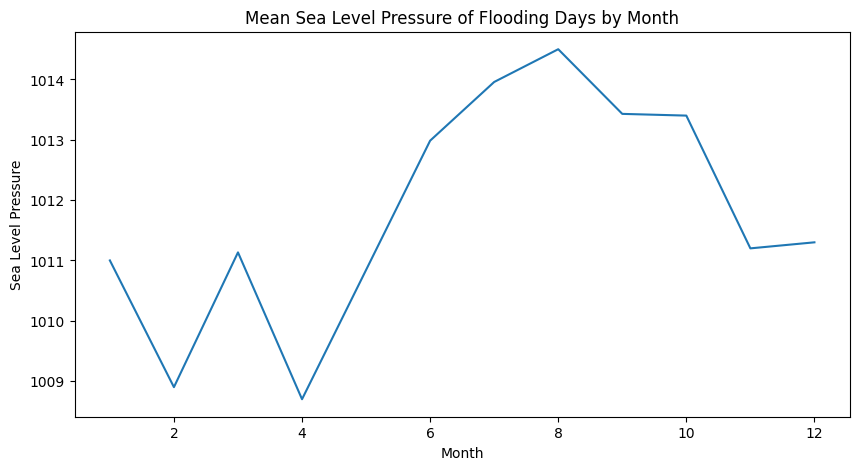

In [ ]:
# Plotting the mean sea level pressure of flooding days by month
plt.figure(figsize=(10,5))
x = flood_data.groupby("month")["sealevelpressure"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Sea Level Pressure of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Sea Level Pressure')
plt.show()

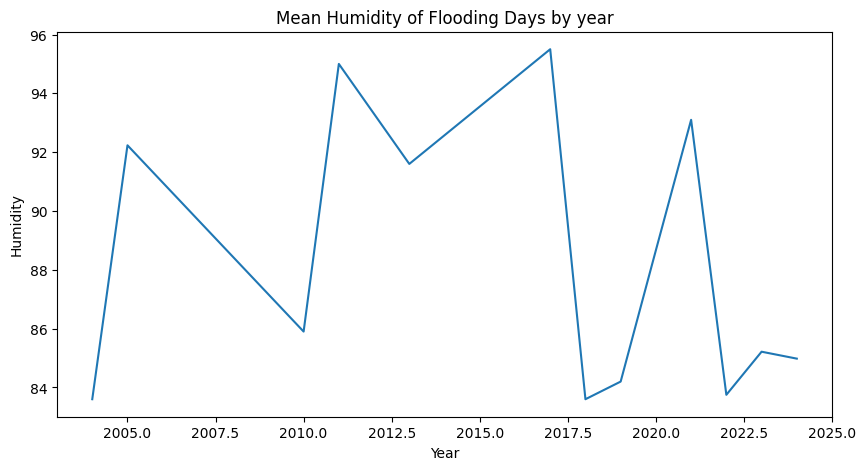

In [ ]:
# Plotting the mean humidity of flooding days by year
plt.figure(figsize=(10,5))
x = flood_data.groupby("year")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Humidity of Flooding Days by year')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.show()

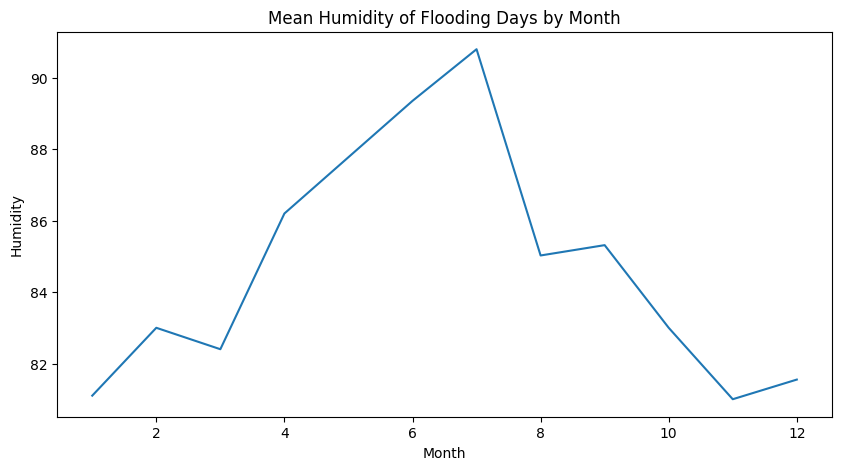

In [ ]:
# Plotting the mean humidity of flooding days by month
plt.figure(figsize=(10,5))
x = flood_data.groupby("month")["humidity"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Humidity of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.show()

In [ ]:

# Displaying the average humidity during flood occurrences
flood_data.humidity.mean()

86.63023255813954

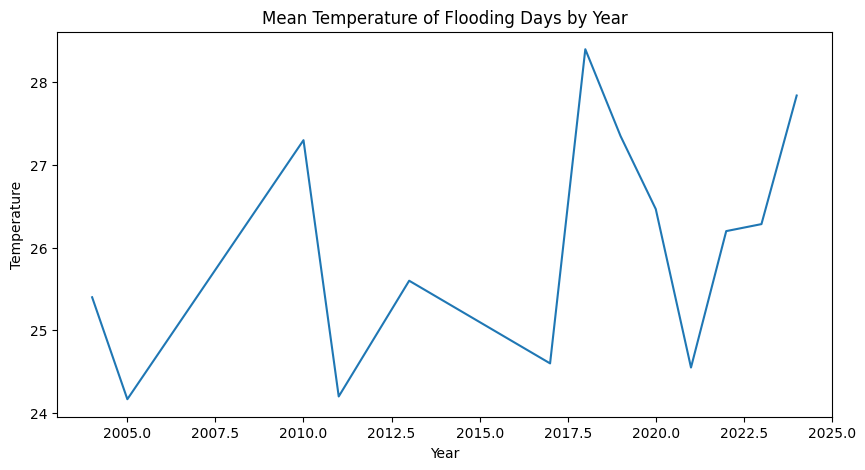

In [ ]:

# Plotting the mean temperature of flooding days by year
plt.figure(figsize=(10,5))
x = flood_data.groupby("year")["temp"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Temperature of Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Displaying the average temperature during flood occurrences
flood_data.temp.mean()

26.42093023255814

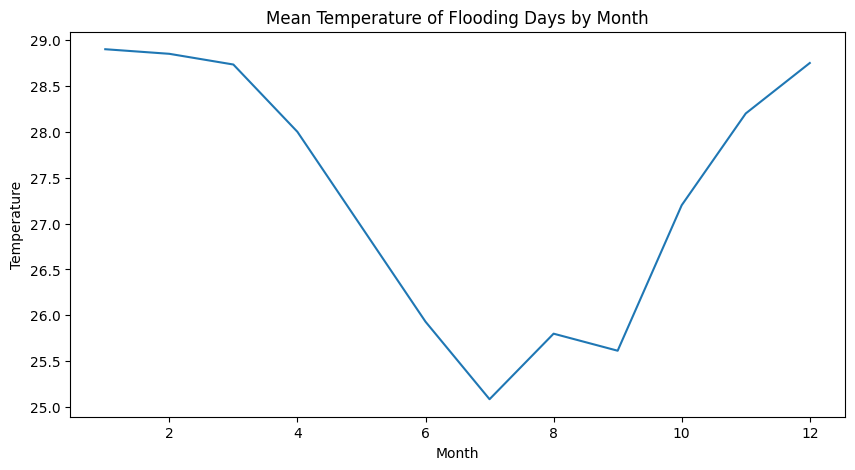

In [ ]:
# Plotting the mean temperature of flooding days by month
plt.figure(figsize=(10,5))
x = flood_data.groupby("month")["temp"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Temperature of Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

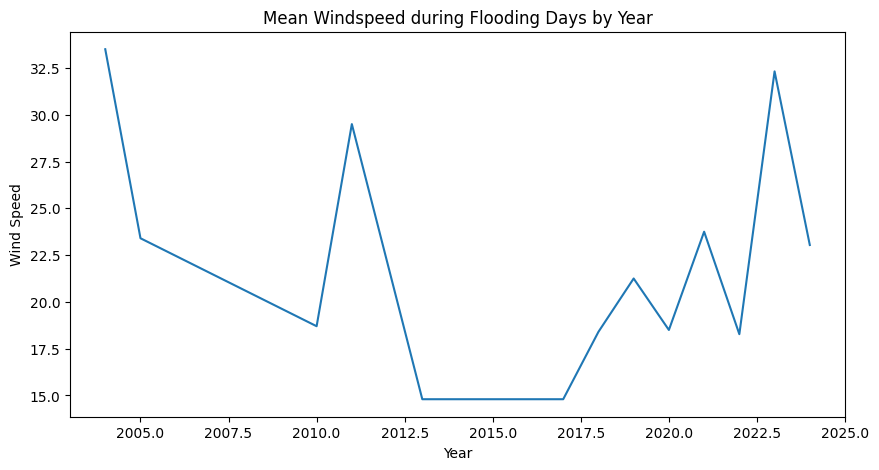

In [ ]:
# Plotting the mean wind speed during flooding days by year
plt.figure(figsize=(10,5))
x = flood_data.groupby("year")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Windspeed during Flooding Days by Year')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.show()

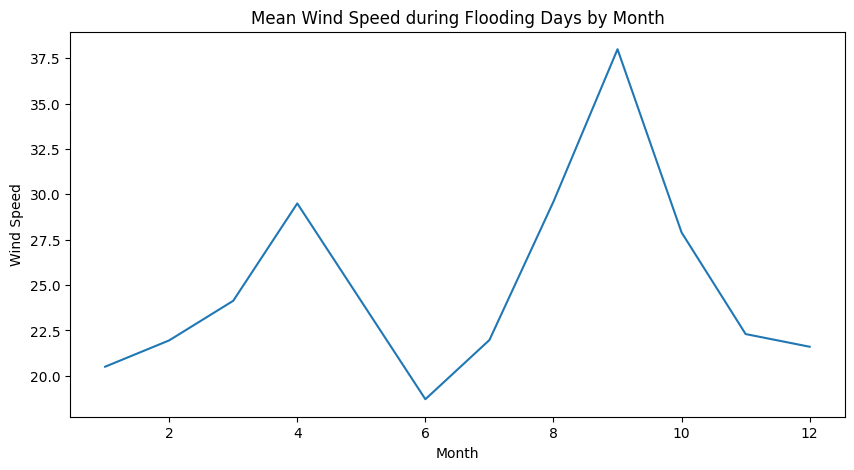

In [ ]:
# Plotting the mean wind speed during flooding days by month
plt.figure(figsize=(10,5))
x = flood_data.groupby("month")["windspeed"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Wind Speed during Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.show()

Categorical Encoding

In [ ]:
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initializing the encoder
encoder = LabelEncoder()

In [ ]:
# Encoding the 'preciptype' column
weather_data['preciptype'] = encoder.fit_transform(weather_data['preciptype'])

In [ ]:
# Displaying the dataset after encoding
weather_data.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flood_occurence,year,month,day
0,0.0,0.0,0.0,0,28.1,20.5,128.2,31.7,28.2,30.0,24.9,74.7,1011.9,0.80,no_flood,2004,5,13
1,0.0,0.0,0.0,0,28.1,20.5,280.4,26.6,25.7,26.3,25.9,97.5,1011.9,0.83,no_flood,2004,5,14
2,0.0,0.0,0.0,0,28.1,16.6,180.0,25.1,25.1,25.1,25.1,100.0,1011.9,0.87,no_flood,2004,5,15
3,0.0,0.0,0.0,0,28.1,11.2,350.0,22.9,22.9,22.9,22.2,95.8,1011.9,0.90,no_flood,2004,5,16
4,0.0,0.0,0.0,0,28.1,31.3,242.3,31.4,25.1,28.6,25.5,84.2,1011.9,0.94,no_flood,2004,5,17


Feature Scaling

In [ ]:
# Importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initializing the scaler
scaler = StandardScaler()

In [ ]:
#columns to scale
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [ ]:
# Scaling the selected columns
weather_data[cols_to_scale] = scaler.fit_transform(weather_data[cols_to_scale])

Defining x_train and y_train

In [ ]:
# Defining x_train and y_train
# Separate features and target variable
x_train = weather_data.drop(['flood_occurence', 'year', 'day', 'month'], axis=1)
y_train = weather_data['flood_occurence']

Resampling

In [ ]:
# Resampling to handle class imbalance
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Counter(y_train)

Counter({'no_flood': 6600, 'flood': 43})

In [ ]:

# Initializing the undersampler
undersampler = RandomUnderSampler()

In [ ]:
# Apply undersampling
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

In [ ]:
x_train_res

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.276042,-0.907467,-0.422498,0,-0.124897,0.867535,0.275960,-1.626762,-0.978817,-1.299822,-0.864101,0.133193,1.622162,0.92
1,7.528545,1.101968,0.179745,1,-0.124897,-0.444550,1.259647,-1.237168,-1.241901,-2.312818,-0.556765,1.715822,0.165852,0.15
2,1.553999,1.101968,-0.121015,1,-0.124897,-0.105667,2.520517,-2.483867,-0.926200,-2.439442,-0.403097,2.128682,-0.058196,0.18
3,-0.276042,-0.907467,-0.422498,0,-0.124897,0.519962,0.588572,-2.016355,-0.189565,-1.489758,-0.966547,0.119431,1.286090,0.08
4,0.644361,1.101968,6.807303,1,-0.124897,-0.418482,0.105065,-1.431965,1.388940,-0.096889,0.365244,0.449719,-0.058196,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.276042,-0.907467,-0.422498,0,-1.171955,-0.600958,-0.013728,0.554961,0.810155,0.726170,0.416467,-0.224619,-0.506291,0.79
82,-0.249129,1.101968,-0.121015,1,-1.171955,0.181080,0.211353,-0.886534,0.283987,-0.666699,0.211576,0.890103,0.725971,0.40
83,-0.270659,1.101968,-0.121015,1,-1.171955,-0.600958,-0.013728,0.710798,0.862772,1.106044,0.570135,-0.417287,-0.506291,0.37
84,-0.276042,-0.907467,-0.422498,0,0.652300,-0.792122,-0.007476,-0.496941,0.178753,-0.666699,-0.659210,-0.307191,1.734185,0.47


In [ ]:
Counter(y_train_res)

Counter({'flood': 43, 'no_flood': 43})

Modeling

In [ ]:
# Initializing classifiers
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

Using Logistic Regression

In [ ]:
log_reg.fit(x_train_res, y_train_res)

LogisticRegression()

In [ ]:
prediction= log_reg.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, prediction)

array([[30, 13],
       [11, 32]])

In [ ]:
print(classification_report(y_train_res, prediction))

              precision    recall  f1-score   support

       flood       0.73      0.70      0.71        43
    no_flood       0.71      0.74      0.73        43

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



Using SVC

In [ ]:
svc.fit(x_train_res, y_train_res)

SVC()

In [ ]:
predy = svc.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[33, 10],
       [ 9, 34]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       0.79      0.77      0.78        43
    no_flood       0.77      0.79      0.78        43

    accuracy                           0.78        86
   macro avg       0.78      0.78      0.78        86
weighted avg       0.78      0.78      0.78        86



Using Random Forest

In [ ]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
predy = rf.predict(x_train_res)

In [ ]:
confusion_matrix(y_train_res, predy)

array([[43,  0],
       [ 0, 43]])

In [ ]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

       flood       1.00      1.00      1.00        43
    no_flood       1.00      1.00      1.00        43

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
# Random Forest is the best performing model

Evaluating Model on Test Data

In [ ]:
# Loading the test dataset
test_data = pd.read_csv('/content/Lagos_Future_weather_forcast_7_to_11_2024.csv')

In [ ]:

test_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"lagos,Nigeria",07/05/2024,30.0,24.0,27.4,36.1,24.0,30.3,24.3,83.1,...,20.1,8,30,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,"lagos,Nigeria",07/06/2024,27.3,26.5,26.8,30.0,26.5,27.8,23.1,80.1,...,20.7,8,30,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,"lagos,Nigeria",07/07/2024,26.9,26.0,26.4,29.3,26.0,26.9,22.8,80.6,...,16.3,7,10,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,"lagos,Nigeria",07/08/2024,26.3,25.2,25.7,26.3,25.2,25.7,22.9,84.4,...,5.2,3,10,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,"lagos,Nigeria",07/09/2024,26.9,24.8,25.9,29.3,24.8,26.2,22.8,83.0,...,18.8,8,10,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN
5,"lagos,Nigeria",07/10/2024,25.9,25.1,25.5,25.9,25.1,25.5,22.8,84.9,...,15.7,6,10,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
6,"lagos,Nigeria",07/11/2024,25.6,23.8,24.6,25.6,23.8,24.6,22.8,90.1,...,1.2,0,10,2024-07-11T06:37:59,2024-07-11T19:06:11,0.18,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN


In [ ]:
test_data.sealevelpressure

0    1014.1
1    1012.7
2    1012.9
3    1012.8
4    1012.3
5    1013.3
6    1014.1
Name: sealevelpressure, dtype: float64

In [ ]:
# Select relevant columns for the test set
test_data_new = test_data.filter(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase'])

In [ ]:
test_data_new.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,3.3,100.0,50.00,rain,24.8,22.3,241.4,30.0,24.0,27.4,24.3,83.1,1014.1,0.00
1,5.9,71.0,54.17,rain,31.0,27.7,225.8,27.3,26.5,26.8,23.1,80.1,1012.7,0.02
2,5.9,74.2,54.17,rain,32.0,29.9,237.2,26.9,26.0,26.4,22.8,80.6,1012.9,0.05
3,24.0,90.3,100.00,rain,30.6,23.8,252.9,26.3,25.2,25.7,22.9,84.4,1012.8,0.08
4,16.0,90.3,95.83,rain,32.8,31.7,247.3,26.9,24.8,25.9,22.8,83.0,1012.3,0.11


In [ ]:
# feature scaling
cols_to_scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'precip',	'precipprob',	'precipcover']

In [ ]:
# Applying the same feature scaling
test_data_new[cols_to_scale] = scaler.transform(test_data_new[cols_to_scale])

In [ ]:
scale = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure']

In [ ]:
test_data_new[scale] = scaler.fit_transform(test_data_new[scale])

In [ ]:
test_data_new.head()

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.281339,-0.885324,-0.191693,rain,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,-0.273807,-0.897034,-0.169897,rain,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,-0.273807,-0.895742,-0.169897,rain,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,-0.221369,-0.889241,0.069657,rain,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,-0.244546,-0.889241,0.047860,rain,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11


In [ ]:
# Encode the 'preciptype' column
test_data_new['preciptype'] = encoder.transform(test_data_new['preciptype'])

In [ ]:
test_data_new

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18


In [ ]:
## Predict Flooding Date
flood_dates = rf.predict(test_data_new)

In [ ]:
flood_dates

array(['no_flood', 'no_flood', 'no_flood', 'no_flood', 'no_flood',
       'flood', 'flood'], dtype=object)

In [ ]:
test_data_new['probable_flood_dates'] = flood_dates

In [ ]:
test_data_new

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,probable_flood_dates
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood


In [ ]:
test_data_new['Date'] = test_data['datetime']

In [ ]:
test_data_new

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,probable_flood_dates,Date
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood,07/05/2024
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood,07/06/2024
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood,07/07/2024
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood,07/08/2024
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood,07/09/2024
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood,07/10/2024
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood,07/11/2024


In [ ]:
test_data_new.columns

Index(['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'probable_flood_dates', 'Date'],
      dtype='object')

In [ ]:
test_data_new.columns = ['precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'sealevelpressure', 'moonphase', 'flooding_likelihod', 'Date']

In [ ]:
test_data_new

,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,tempmax,tempmin,temp,dew,humidity,sealevelpressure,moonphase,flooding_likelihod,Date
0,-0.281339,-0.885324,-0.191693,1,-2.222015,-1.502236,-0.137369,2.231836,-1.165680,1.596695,2.400026,-0.208889,1.434211,0.00,no_flood,07/05/2024
1,-0.273807,-0.897034,-0.169897,1,-0.059785,0.223737,-1.881635,0.232703,1.590995,0.890788,0.055815,-1.183706,-0.728138,0.02,no_flood,07/06/2024
2,-0.273807,-0.895742,-0.169897,1,0.288962,0.926912,-0.606979,-0.063465,1.039660,0.420183,-0.530238,-1.021236,-0.419231,0.05,no_flood,07/07/2024
3,-0.221369,-0.889241,0.069657,1,-0.199284,-1.022799,1.148469,-0.507716,0.157524,-0.403376,-0.334887,0.213531,-0.573685,0.08,no_flood,07/08/2024
4,-0.244546,-0.889241,0.047860,1,0.567959,1.502236,0.522322,-0.063465,-0.283544,-0.168073,-0.530238,-0.241383,-1.345952,0.11,no_flood,07/09/2024
5,-0.212388,-0.897034,-0.082815,1,1.195703,0.447475,-0.238000,-0.803884,0.047257,-0.638678,-0.530238,0.376001,0.198583,0.15,flood,07/10/2024
6,-0.001189,-0.904867,-0.278828,1,0.428460,-0.575324,1.193193,-1.026010,-1.386214,-1.697539,-0.530238,2.065683,1.434211,0.18,flood,07/11/2024


In [ ]:
#preparing data for plotting
plt_data = test_data_new.filter(['Date', 'flooding_likelihod'])
plt_data.flooding_likelihod.replace('no_flood', 0, inplace=True)
plt_data.flooding_likelihod.replace('flood', 1, inplace=True)

In [ ]:
plt_data

,Date,flooding_likelihod
0,07/05/2024,0
1,07/06/2024,0
2,07/07/2024,0
3,07/08/2024,0
4,07/09/2024,0
5,07/10/2024,1
6,07/11/2024,1


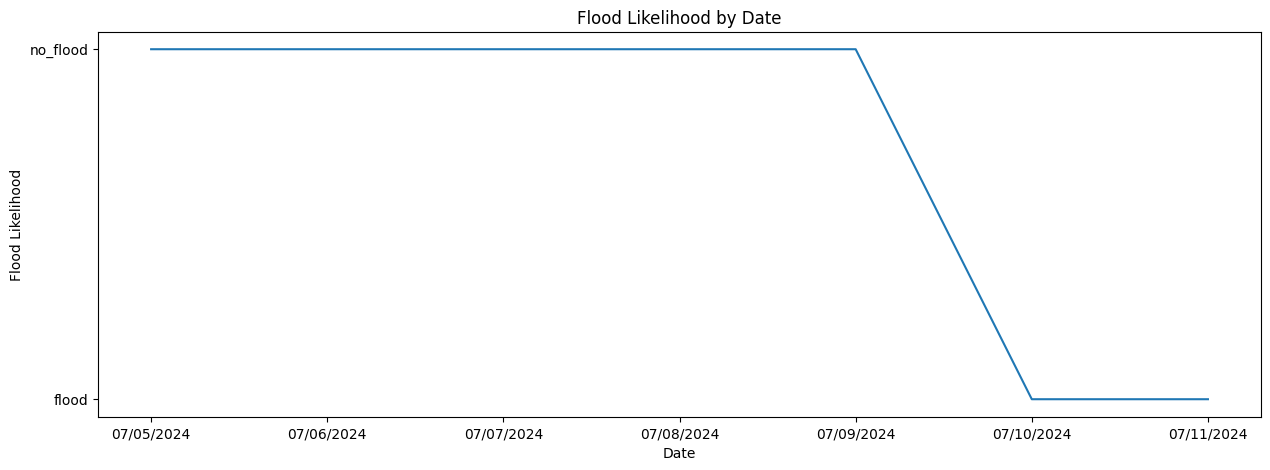

In [ ]:
# plot the graph of flood likelihood against date
plt.figure(figsize=(15,5))
plt.title('Flood Likelihood by Date')
sns.lineplot(x='Date', y='flooding_likelihod', data=test_data_new)

plt.xlabel('Date')
plt.ylabel('Flood Likelihood')
plt.show()